In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [14]:
df = pd.read_csv('AdBlue data.csv',
    usecols=['transaction_date', 'volume']
)

df['day'] = df['transaction_date'].apply(lambda x: f"{x.split('/')[1]:0>2}")
df['month'] = df['transaction_date'].apply(lambda x: f"{x.split('/')[0]:0>2}")
df['year'] = df['transaction_date'].apply(lambda x: f"{'20' + x.split('/')[2]}")


df['transaction_date'] = pd.to_datetime(df['year']+'-'+df['month']+'-'+df['day'], format='%Y-%m-%d')
df = df.groupby(["year", "month"])["volume"].sum()

df = pd.DataFrame(df).reset_index()
df = df['volume']
df

0         4664.74
1       123483.42
2       176641.20
3       185616.03
4       207943.57
          ...    
132     947839.08
133    1017285.91
134     952713.27
135     966340.14
136    1057412.82
Name: volume, Length: 137, dtype: float64

<Axes: >

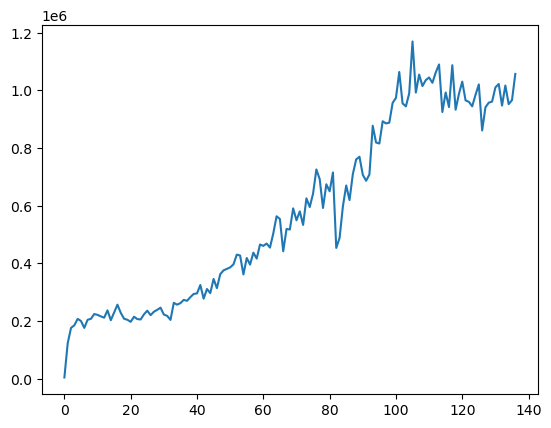

In [3]:
df.plot()

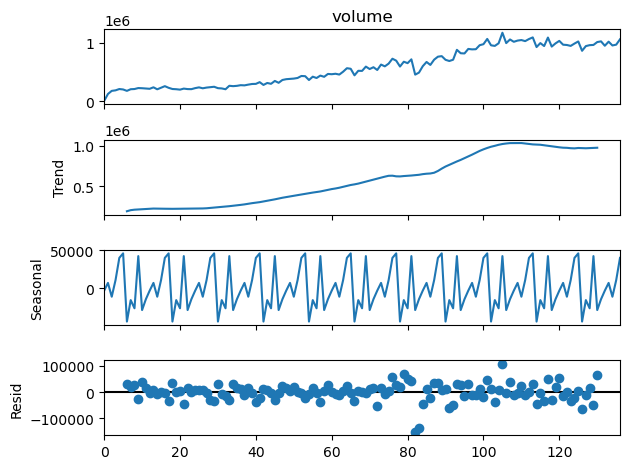

In [17]:
results = seasonal_decompose(df, model = 'additive', period=12)
results.plot()
plt.show()

In [5]:
result = adfuller(df)

In [6]:
i = 0
while result[1] > 0.05:
    i+=1
    df = df.diff(1)
    df = df.dropna()
    result = adfuller(df)
    stationary_interpretation = 'Stationary' if result[1] < 0.05 else 'Non-Stationary'
    print(f"Iteration {i}")
    print(f"ADF Statistic after differencing: {result[0]}")
    print(f"P Value: {result[1]}")
    print(f"Interpretation: {stationary_interpretation}")


Iteration 1
ADF Statistic after differencing: -2.492684989711254
P Value: 0.11726430592116932
Interpretation: Non-Stationary
Iteration 2
ADF Statistic after differencing: -7.743184979402693
P Value: 1.0486280901759094e-11
Interpretation: Stationary


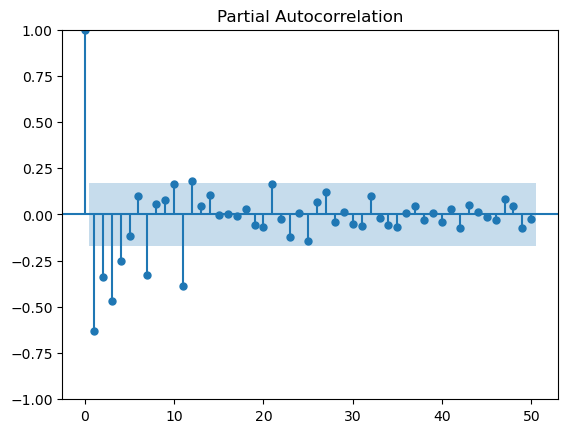

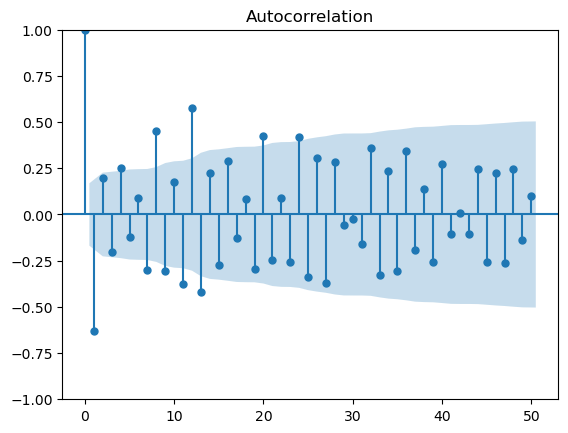

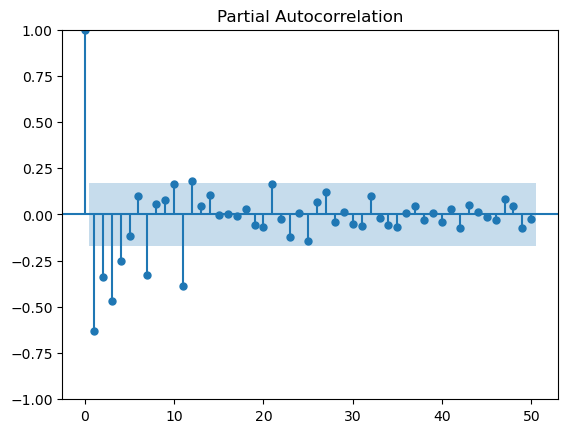

In [7]:
plot_acf(df, lags = 50)
plot_pacf(df, lags = 50)

In [8]:
p, d, q = 1, 0, 1

model = ARIMA(df, order=(p,d,q))
model_fit = model.fit()
model_summary = model_fit.summary()
model_summary

/Users/alexdutton/miniconda3/envs/coursework/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alexdutton/miniconda3/envs/coursework/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alexdutton/miniconda3/envs/coursework/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 volume   No. Observations:                  135
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1675.010
Date:                Tue, 19 Nov 2024   AIC                           3358.019
Time:                        13:37:20   BIC                           3369.640
Sample:                             0   HQIC                          3362.742
                                - 135                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.0264    129.589     -0.216      0.829    -282.017     225.964
ar.L1         -0.3871      0.113     -3.414      0.001      -0.609      -0.165
ma.L1         -0.9930      0.095    -10.455      0.000      -1.179      -0.807
sigma2      4.348e+09   7.13e-06   6.09e+14      0.000    4.35e+09    4.35e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                60.94
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               6.10   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.56e+30. Standard errors may be unstable.
"""

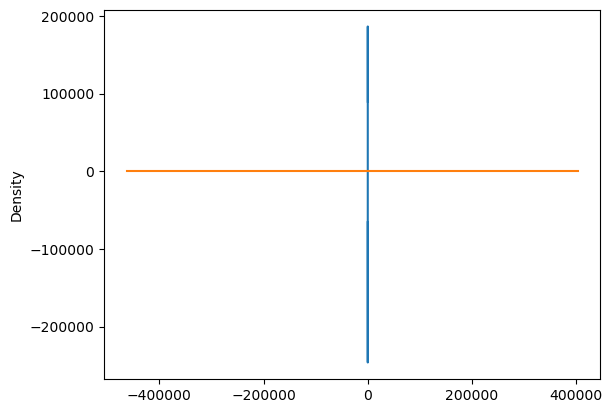

In [9]:
residuals = model_fit.resid
residuals.plot()
residuals.plot(kind='kde')
plt.show()


In [10]:
data = df
train_size = int(len(data) * 0.80)
train, test = data[:train_size], data[train_size:]

In [11]:
forecast = model_fit.forecast(steps=len(test))
print(forecast)

135   -118836.180399
136     45959.053050
137    -17828.248055
138      6861.906490
139     -2694.913142
140      1004.245619
141      -427.587989
142       126.631933
143       -87.890006
144        -4.854986
145       -36.995356
146       -24.554781
147       -29.370155
148       -27.506268
149       -28.227723
150       -27.948470
151       -28.056560
152       -28.014722
153       -28.030916
154       -28.024648
155       -28.027074
156       -28.026135
157       -28.026498
158       -28.026358
159       -28.026412
160       -28.026391
161       -28.026399
Name: predicted_mean, dtype: float64


/Users/alexdutton/miniconda3/envs/coursework/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/alexdutton/miniconda3/envs/coursework/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


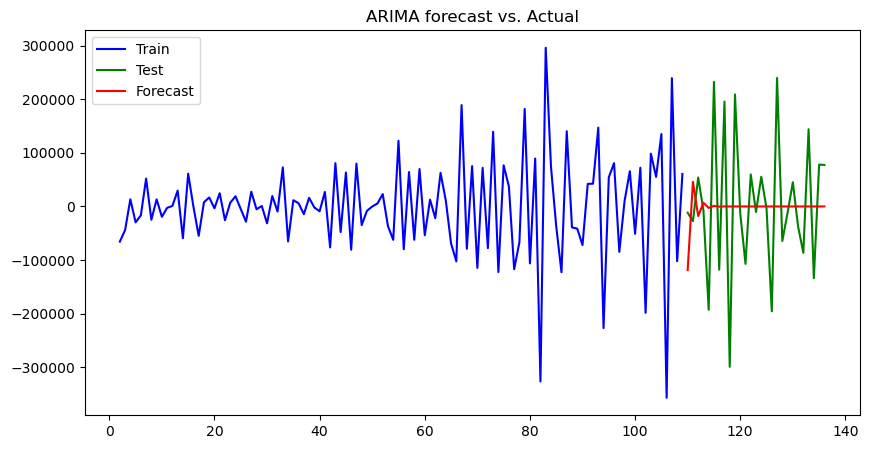

In [12]:
plt.figure(figsize=(10,5))
plt.plot(data.index[:train_size], train, label='Train', color='blue')
plt.plot(data.index[train_size:], test, label='Test', color='green')
plt.plot(data.index[train_size:], forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA forecast vs. Actual')
plt.show()